In [192]:
from matplotlib import pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd

In [193]:
df_blobs = pd.read_csv("datasets\\blobs.csv", header = 0) 
df_circles = pd.read_csv('datasets\\circles.csv', header = 0)
df_moons = pd.read_csv('datasets\\moons.csv', header = 0)
df_xor = pd.read_csv('datasets\\xor.csv', header = 0)

In [378]:
'''plotting functions'''
def plot_acceptance(X, acceptance):
    plt.scatter(X[:, 0], X[:, 1], c=acceptance, cmap='cool')

def plot_boundary(model, x_limits, y_limits):
    x_min, x_max = x_limits 
    y_min, y_max = y_limits
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
    xxr = xx.ravel()
    yyr = yy.ravel()
    z = np.array([xxr, yyr])
    out = np.argmax(model.forward(z), axis=0)
    plt.contourf(xx, yy, out.reshape(xx.shape), cmap='winter')    
    print(xxr)

In [195]:
'''Blobs'''
df_blobs.head()

,x1,x2,y
0,-4.561953,7.417011,1
1,0.524310,-8.625529,0
2,-9.425533,4.933556,2
3,-7.063583,3.658536,2
4,-3.994567,8.342583,1


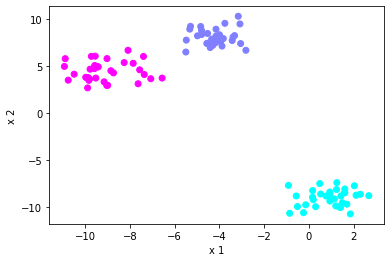

In [196]:
x = df_blobs[['x1','x2']].values
y= df_blobs['y'].values

y_blobs = np.zeros(())
plot_acceptance(x, y)
plt.xlabel('x 1')
plt.ylabel('x 2')

#reshape to get shape that work with NN (featurs, N)
x_blobs = x.T

y_blobs = np.zeros((3,len(y)))
for i, val in zip(range(len(y)), y):
    y_blobs[val][i] = 1

In [197]:
'''define sigmoide function and derivative'''
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
  return sigmoid(x)*(1-sigmoid(x))

In [277]:
class neural_net:
    def __init__(self, nn_shape: list):
        ''' input a list ej [4, 3, 5] where each value is the numer of neurons in each layer
        and the length of the list is number of leyers'''
        self.l = len(nn_shape)
        self.nn_shape = nn_shape
        #initialize wigth matixes randomly with shape [n^{[L]},n^{[L-1]}]
        self.weigths = [ np.random.rand(x,y) for x, y in zip(nn_shape[1:],nn_shape[:-1])]
        #itilize baises ranomly to all leyers exept the first one becouse it is the input
        self.baises = [np.random.rand(n,1) for n in nn_shape[1:]]

    def forward(self, inp):
        a = inp
        for bais, weigth in zip(self.baises, self.weigths):
            a = sigmoid(np.dot(weigth,a)+bais)
        return a

    def back_prop(self, x, y):
      grad_b = [np.zeros(bais.shape) for bais in self.baises]
      grad_w = [np.zeros(weigth.shape) for weigth in self.weigths]
      #input for the i th leyer
      input_i = x
      #store the activation function of each leyer
      activations = [x]
      #store all z for each leyer
      zvec = []
      # cache all relevant matrixes
      for w, b in zip(self.weigths, self.baises):
        z_i = np.dot(w,input_i) + b
        zvec.append(z_i)
        input_i = sigmoid(z_i)
        activations.append(input_i)
      # back  prop
      
      # using the mean squere cosnt function
      delta_L = (activations[-1]-y) #cost derivative

      # delta => cost_derivative * sigmoid(z^L)
      delta = delta_L# * sigmoid_deriv(zvec[-1])

      #the L gradienents going backwards, i.e. last leyer
      grad_b[-1] = delta
      grad_w[-1] = np.dot(delta, activations[-2].T)
      #grad_w[-1] = delta@ activations[-2].T 

      for i in range(2, self.l):
        #print(i)
        z = zvec[-i]
        sig_der = sigmoid_deriv(z)
        delta = np.dot(self.weigths[-i+1].T, delta) * sig_der
        grad_b[-i] = delta
        grad_w[-i] = np.dot(delta, activations[-i-1].T)
        #grad_w[-i] = delta@ activations[-i-1].T
      return grad_b, grad_w

    def train_single(self,x,y,alpha,lmbda):
      #trin with a single batch
      #input X, Y, alpha -> learning rate, lmbda -> regularization parameter
      # => updates weigths an baias according to batch (x,y)
      m = y.shape[1] # number of training samples
      grad_b, grad_w = self.back_prop(x,y) # backprop to calc the gradiant  

      self.baises = [ b - np.sum(db, axis=1, keepdims=True)*(alpha/m)  for b, db in zip(self.baises, grad_b)]
      self.weigth = [ w*(1-alpha*(lmbda/m))- dw*(alpha/m)  for w, dw, in zip(self.weigths, grad_w)]
    
    def get_cost(self,x,y):
      #return const, mean squere error
      m = y.shape[1]
      predict = self.forward(x)
      return (1/(2*m))*np.sum((y-predict)**2)

    def train(self,x,y,alpha,lmbda):
        #trian with individual  samples
        m = y.shape[1]
        for i in range(m):
            x1 = x[:,i].reshape((x.shape[0],1))
            y1 = y[:,i].reshape((y.shape[0],1))
            self.train_single(x1,y1,alpha,lmbda)
      

BLOBS
create a NN with shape $[2, 3, 3]$

In [422]:
blob_nn = neural_net([2,9,3])
#[2,9,3] funciona bien con alpha 0.05, lambda = 0, 500,00 epochs

In [423]:
'''training loop'''
epochs = 500_00
cost = [0.0]*(epochs +1)
cost[0]=blob_nn.get_cost(x_blobs,y_blobs)

for i in range(1,epochs+1):
    blob_nn.train_single(x_blobs,y_blobs, alpha=0.05,lmbda=0)
    #blob_nn.train(x_blobs,y_blobs,alpha=0.001,lmbda=0.001)
    cost[i]=blob_nn.get_cost(x_blobs,y_blobs)

0.2875421341059331

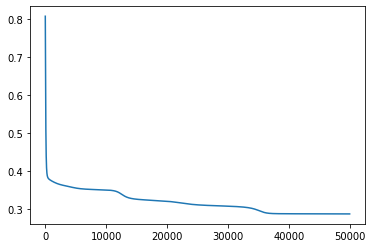

In [424]:
plt.plot(cost)
cost[-1]

In [425]:
r = blob_nn.forward(x_blobs)


In [426]:
p = np.argmax(r, axis=0)
p

array([1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2,
       2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2], dtype=int64)

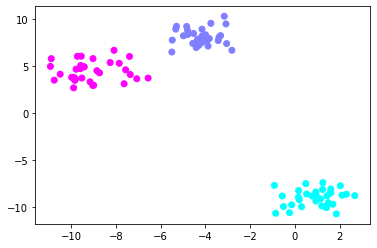

In [427]:
plot_acceptance(x,p)

[-10.          -9.93969849  -9.87939698 ...   1.87939698   1.93969849
   2.        ]


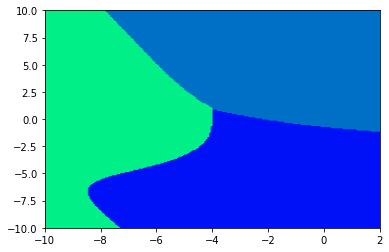

In [428]:
plot_boundary(blob_nn,(-10,2),(-10,10))